In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Carregar a base de dados Iris
iris = load_iris()
X = iris.data

# Converter para DataFrame para facilitar a visualização
df = pd.DataFrame(data=X, columns=iris.feature_names)

# Exibir as primeiras linhas do DataFrame
print(df.head())

# Descrição dos dados
print(df.describe())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

In [3]:
# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Aplicar o K-Means com 3 clusters (porque sabemos que há 3 espécies de Iris)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Obter os rótulos dos clusters
labels = kmeans.labels_

# Adicionar os rótulos dos clusters ao DataFrame
df['cluster'] = labels


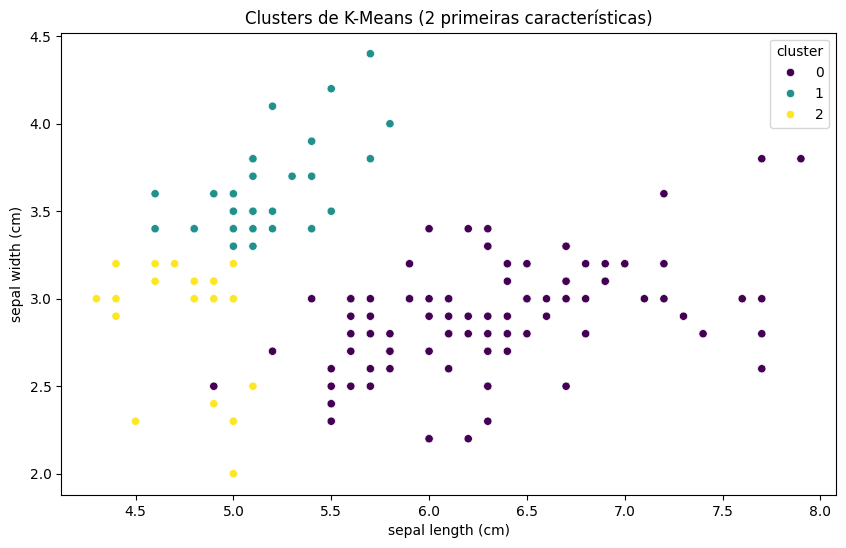

In [5]:
# Visualizar os clusters usando um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df[iris.feature_names[0]], y=df[iris.feature_names[1]], hue='cluster', palette='viridis', data=df)
plt.title('Clusters de K-Means (2 primeiras características)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


In [6]:
# Comparar os clusters com as classes verdadeiras
true_labels = iris.target

# Criar uma tabela de contingência para comparar
contingency_table = pd.crosstab(true_labels, labels)
print(contingency_table)


col_0   0   1   2
row_0            
0       0  33  17
1      46   0   4
2      50   0   0


In [7]:
#Este exemplo demonstra como usar o algoritmo K-Means para agrupar dados de maneira não supervisionada. Utilizei a base de dados Iris, apliquei o K-Means e visualizei os clusters. Também foi comparado os clusters encontrados com as classes verdadeiras para avaliar o desempenho do modelo.